## Predictions of BTC-USD Price Using SBi-LSTM and SBi-GRU

In [1]:
# lib manipulation data
import numpy as np
import pandas as pd

# load all functions
from C01_data_collection import *
from C02_visualization import * 
from C03_preprocessing import *
from C04_model_predictions import *

- config models

In [2]:
# set random number
import tensorflow as tf
tf.random.set_seed(1234)

### 1. Data Collections

In [3]:
# load dataset
dataset = data_collection("Cryptocurrency-BTC-USD-2024-04.csv")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3408 entries, 0 to 3407
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3408 non-null   datetime64[ns]
 1   Open    3408 non-null   float64       
 2   High    3408 non-null   float64       
 3   Low     3408 non-null   float64       
 4   Close   3408 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 133.3 KB


In [4]:
# show dataset
print(dataset.tail())

           Date          Open          High           Low         Close
3403 2024-04-26  64485.371094  64789.656250  63322.398438  63755.320313
3404 2024-04-27  63750.988281  63898.363281  62424.718750  63419.140625
3405 2024-04-28  63423.515625  64321.484375  62793.597656  63113.230469
3406 2024-04-29  63106.363281  64174.878906  61795.457031  63841.121094
3407 2024-04-30  63839.417969  64703.332031  59120.066406  60636.855469


### 2. Exploration Data Analysis

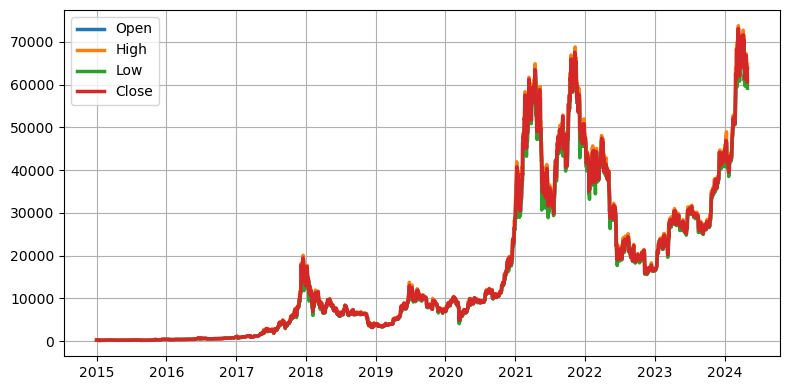

In [5]:
timeseries_matplotlib(dataset, ["Open", "High", "Low", "Close"])

### 3. Data Preprocessing

In [6]:
# proses normalisasi min-max
scaler, scaled = normalized(dataset, ["Close"])

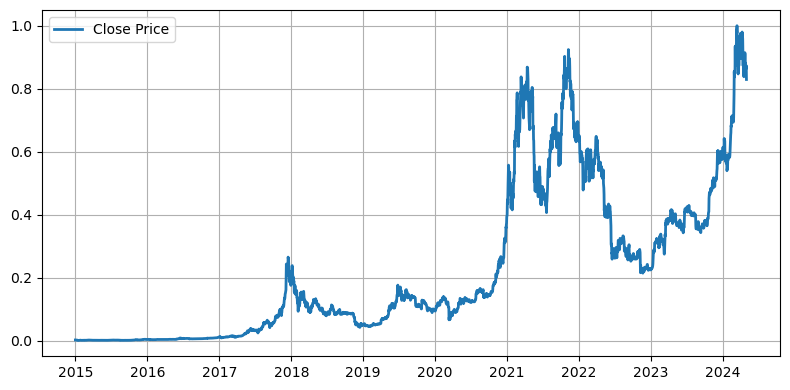

In [7]:
# hasil normalisasi data
lineplot_matplotlib1(x1=dataset["Date"], y1=scaled, label1="Close Price")

In [8]:
# proses pembagian data
train_data, test_data = splitting(scaled)

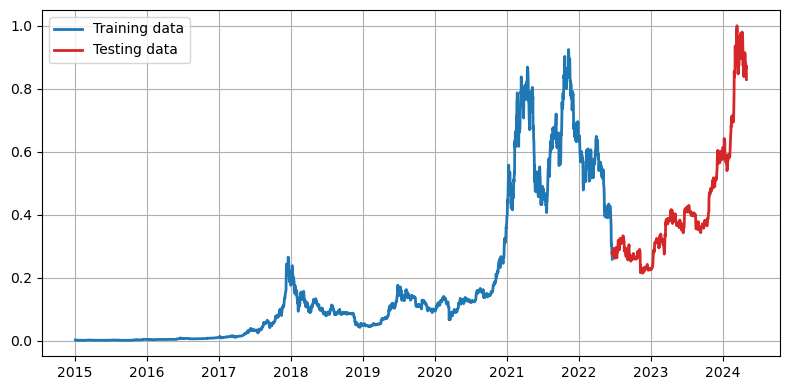

In [9]:
# hasil pembagian data
lineplot_matplotlib2(
  x1=dataset["Date"].loc[1:len(train_data)], y1=train_data, label1="Training data",
  x2=dataset["Date"].loc[len(train_data):len(dataset)], y2=test_data, label2="Testing data",
)

### 4. Supervised Learning

In [10]:
# function for supervised learning
x_train, y_train, x_test, y_test = results_supervised_learning(train_data, test_data)

In [11]:
# cek dimensi data
print(x_train.shape, y_train.shape)

(2725, 1, 1) (2725,)


In [12]:
# cek dimensi data
print(x_test.shape, y_test.shape)

(681, 1, 1) (681,)


### 5.1 Modeling SBi-LSTM

In [ ]:
# call models LSTM
lstm_model = get_models(algorithm="SBi-LSTM", timestep=x_train.shape[1])

In [ ]:
# compile models
lstm_history, lstm_predictions = get_predictions(
  model=lstm_model,
  x_train=x_train, y_train=y_train,
  x_test=x_test, y_test=y_test,
  batch_size=8, epochs=1500
)